In [2]:
import torch
from torch import nn
from torch.nn import functional as F
import torchvision
import torchvision.datasets as datasets
import time 

In [5]:
# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [6]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [76]:
mnist_train = mnist_trainset.data
mnist_test = mnist_testset.data

mnist_trainlabel = mnist_trainset.targets
mnist_testlabel = mnist_testset.targets

mnist_train = mnist_train.to(device)
mnist_test = mnist_test.to(device)
mnist_trainlabel = mnist_trainlabel.to(device)
mnist_testlabel = mnist_testlabel.to(device)

In [77]:
print(mnist_train.shape)
print(mnist_test.shape)
print(mnist_trainlabel.shape)
print(mnist_testlabel.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
torch.Size([60000])
torch.Size([10000])


In [9]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 50) 
        self.fc3 = nn.Linear(50, 10) 


    def forward(self, x):
        x = x.view(-1,784) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [10]:
def accuracy(y_pred,y_ground):
    return (torch.sum(torch.argmax(y_pred,axis=1) == y_ground) / y_ground.size(0)).item()

In [ ]:
def train(model, train_input, train_target, mini_batch_size, nb_epochs = 100,eta = 1e-3, verbose=False, milestones=[101,101]):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), eta, momentum=0)
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1, last_epoch=-1, verbose=False)
    tr_losses = []
    
    for e in range(nb_epochs):
        total_loss = 0

        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b , mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            total_loss = total_loss + loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        tr_losses.append(total_loss)
    
        if verbose:
            print('Epoch %d/%d, Cross Entropy Loss: %.3f' %(e+1, nb_epochs, total_loss))
    
    return tr_losses  
        

In [62]:
mlp = MLP()
mlp.to(device)
loss = train(mlp, mnist_train.float(), mnist_trainlabel,
            50,nb_epochs = 100,eta=1e-3,verbose=False)

In [63]:
mlp = MLP()
mlp.to(device)

loss1 = train(mlp, mnist_train.float(), mnist_trainlabel,
            50,nb_epochs = 100,eta=1e-3,verbose=False, milestones=[20,80])

In [71]:
mlp = MLP()
mlp.to(device)
loss2 = train(mlp, mnist_train.float(), mnist_trainlabel,
            50,nb_epochs = 100,eta=1e-3,verbose=False, milestones=[33,66] )

In [72]:
import matplotlib.pyplot as plt

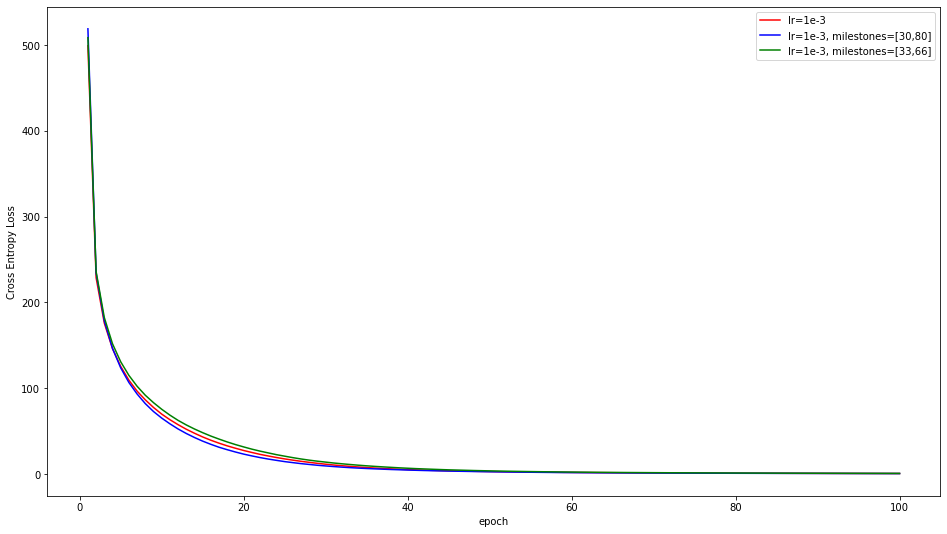

In [73]:
plt.figure(figsize=(16,9))
plt.plot(range(1,101), loss, c = 'r', label='lr=1e-3')
plt.plot(range(1,101), loss1, c = 'b', label='lr=1e-3, milestones=[30,80]')
plt.plot(range(1,101), loss2, c = 'g', label='lr=1e-3, milestones=[33,66]')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc=1)

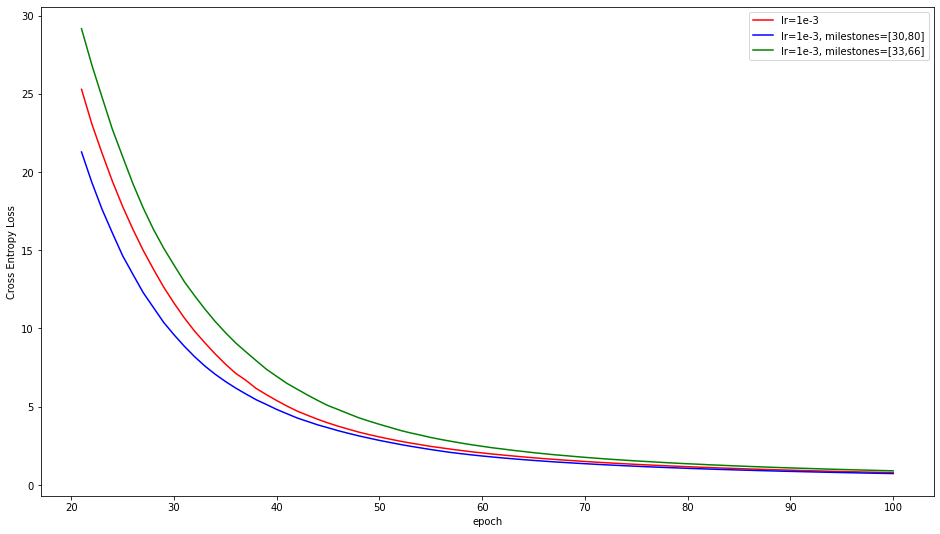

In [75]:
plt.figure(figsize=(16,9))
plt.plot(range(21,101), loss[20:], c = 'r', label='lr=1e-3')
plt.plot(range(21,101), loss1[20:], c = 'b', label='lr=1e-3, milestones=[30,80]')
plt.plot(range(21,101), loss2[20:], c = 'g', label='lr=1e-3, milestones=[33,66]')
plt.xlabel('epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend(loc=1)